# SOLAR RADIATION PREDICTION

These datasets are meteorological data from the HI-SEAS (Hawai'i Space Exploration Analog and Simulation) weather station from four months (September through December 2016) between Mission IV and Mission V.

For each dataset, the fields are:

A row number (1-n) useful in sorting this export's results The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results The date in yyyy-mm-dd format The local time of day in hh:mm:ss 24-hour format The numeric data, if any (may be an empty string) The text data, if any (may be an empty string)

The units of each dataset are:

- Solar radiation: watts per meter^2
- Temperature: degrees Fahrenheit
- Humidity: percent
- Barometric pressure: Hg
- Wind direction: degrees
- Wind speed: miles per hour
- Sunrise/sunset: Hawaii time

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

from datetime import datetime
%matplotlib inline

In [2]:
data = pd.read_csv('SolarPrediction.csv')
print(data.info())
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
UNIXTime                  32686 non-null int64
Data                      32686 non-null object
Time                      32686 non-null object
Radiation                 32686 non-null float64
Temperature               32686 non-null int64
Pressure                  32686 non-null float64
Humidity                  32686 non-null int64
WindDirection(Degrees)    32686 non-null float64
Speed                     32686 non-null float64
TimeSunRise               32686 non-null object
TimeSunSet                32686 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB
None


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [3]:
print(data.columns)
display(data.describe())

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [4]:
data.isna().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [5]:
listItem_ = []

for col in data.columns:
    listItem_.append([col,data[col].value_counts().sum(),
                     data[col].nunique(),
                     data[col].value_counts().sort_values(ascending=False).index[0],
                     list(data[col].value_counts())[0]])
                     

df = pd.DataFrame(columns=['','count', 'unique', 'top', 'freq'], data=listItem_)
df

,,count,unique,top,freq
0,UNIXTime,32686,32686,1473839104,1
1,Data,32686,118,12/12/2016 12:00:00 AM,288
2,Time,32686,8299,16:20:18,24
3,Radiation,32686,14434,1.22,2264
4,Temperature,32686,38,45,2951
5,Pressure,32686,38,30.44,3297
6,Humidity,32686,94,102,2107
7,WindDirection(Degrees),32686,17951,0.11,94
8,Speed,32686,37,5.62,4609
9,TimeSunRise,32686,51,06:11:00,1399


# EDA

In [6]:
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].drop_duplicates().unique()[:2])]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,UNIXTime,int64,0,0.0,32686,"[1475229326, 1475229023]"
1,Data,object,0,0.0,118,"[9/29/2016 12:00:00 AM, 9/28/2016 12:00:00 AM]"
2,Time,object,0,0.0,8299,"[23:55:26, 23:50:23]"
3,Radiation,float64,0,0.0,14434,"[1.21, 1.23]"
4,Temperature,int64,0,0.0,38,"[48, 49]"
5,Pressure,float64,0,0.0,38,"[30.46, 30.47]"
6,Humidity,int64,0,0.0,94,"[59, 58]"
7,WindDirection(Degrees),float64,0,0.0,17951,"[177.39, 176.78]"
8,Speed,float64,0,0.0,37,"[5.62, 3.37]"
9,TimeSunRise,object,0,0.0,51,"[06:13:00, 06:12:00]"


### Create Feature Total Time Sun

In [7]:
data['Total_TimeSun'] = pd.to_datetime(data['TimeSunSet']).dt.hour - pd.to_datetime(data['TimeSunRise']).dt.hour

### Create Feature Hour

In [8]:
data['Time_conv'] =  pd.to_datetime(data['Time'], format='%H:%M:%S')
data['hour'] = pd.to_datetime(data['Time_conv'], format='%H:%M:%S').dt.hour

### Create Feature Month and Days

In [9]:
data_test = data['Data'].str.replace(' 12:00:00 AM','').copy()
pd.to_datetime(data_test)

0       2016-09-29
1       2016-09-29
2       2016-09-29
3       2016-09-29
4       2016-09-29
           ...    
32681   2016-12-01
32682   2016-12-01
32683   2016-12-01
32684   2016-12-01
32685   2016-12-01
Name: Data, Length: 32686, dtype: datetime64[ns]

In [10]:
data['Month'] = pd.to_datetime(data_test).dt.month
data['Days'] = pd.to_datetime(data_test).dt.day

In [11]:
Month = []
for i in data['Month'].values :
    if i == 1:
        Month.append('January')
    elif i == 9 :
        Month.append('September')
    elif i == 10:
        Month.append('October')
    elif i == 11:
        Month.append('November')
    else:
        Month.append('December')

data['Month_cat'] = pd.Series(Month)

### Create Wind Direct based on Categorical

In [12]:
Direct = []
for i in data['WindDirection(Degrees)'].values :
    if i >= 45.01 and i <=135.00 :
        Direct.append('East')
    elif i >= 135.01 and i <= 225.00:
        Direct.append('South')
    elif i >= 225.01 and i <= 315.00:
        Direct.append('West')
    else:
        Direct.append('North')
    
data['direct'] = pd.Series(Direct)

### Create New DataFrame

In [13]:
data2 = pd.DataFrame(data, columns=['Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','direct','Speed',
            'Total_TimeSun','Month','Month_cat','Days','hour'])
data2.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),direct,Speed,Total_TimeSun,Month,Month_cat,Days,hour
0,1.21,48,30.46,59,177.39,South,5.62,12,9,September,29,23
1,1.21,48,30.46,58,176.78,South,3.37,12,9,September,29,23
2,1.23,48,30.46,57,158.75,South,3.37,12,9,September,29,23
3,1.21,48,30.46,60,137.71,South,3.37,12,9,September,29,23
4,1.17,48,30.46,62,104.95,East,5.62,12,9,September,29,23


In [14]:
print(data2.info())
display(data2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 12 columns):
Radiation                 32686 non-null float64
Temperature               32686 non-null int64
Pressure                  32686 non-null float64
Humidity                  32686 non-null int64
WindDirection(Degrees)    32686 non-null float64
direct                    32686 non-null object
Speed                     32686 non-null float64
Total_TimeSun             32686 non-null int64
Month                     32686 non-null int64
Month_cat                 32686 non-null object
Days                      32686 non-null int64
hour                      32686 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 3.0+ MB
None


,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Total_TimeSun,Month,Days,hour
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,11.347886,10.526066,15.825766,11.557425
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.476307,1.096691,8.711824,6.912034
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,11.000000,9.000000,1.000000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,11.000000,10.000000,9.000000,6.000000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,11.000000,16.000000,12.000000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,12.000000,11.000000,23.000000,18.000000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,12.000000,31.000000,23.000000


## Hypothesis Test

Radiation
Not-Normal Distribution
Skewness: 1.3696184164285883, Kurtosis 0.5108222385707175


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


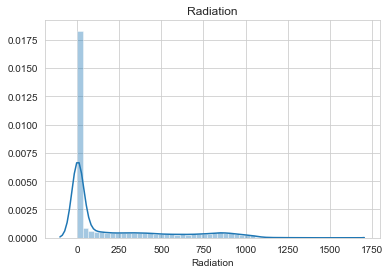



Temperature
Not-Normal Distribution
Skewness: 0.5220787041165489, Kurtosis -0.3162676455656399


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


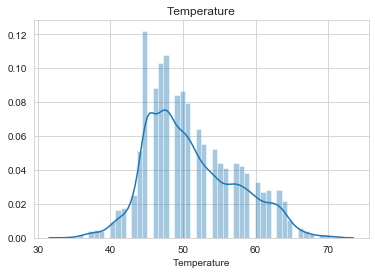



Pressure
Not-Normal Distribution
Skewness: -1.2269053251857862, Kurtosis 2.119399837255804


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


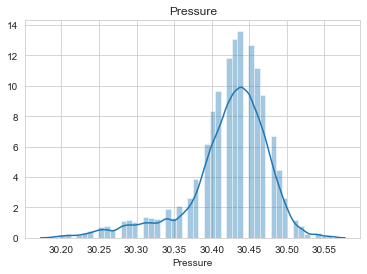



Humidity
Not-Normal Distribution
Skewness: -0.7762447903097277, Kurtosis -0.750750085059698


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


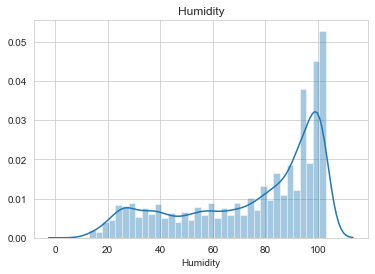



WindDirection(Degrees)
Not-Normal Distribution
Skewness: 0.5685858790947774, Kurtosis 0.23091059520715218


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


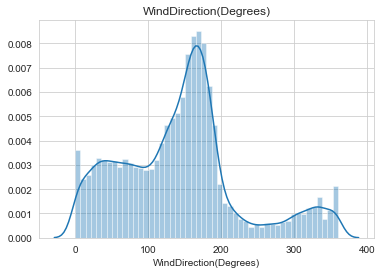



Speed
Not-Normal Distribution
Skewness: 1.469747015168225, Kurtosis 6.630948124184544


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


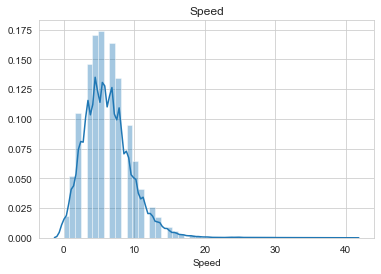



Total_TimeSun
Not-Normal Distribution
Skewness: 0.6387326513019101, Kurtosis -1.5920206001608326


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


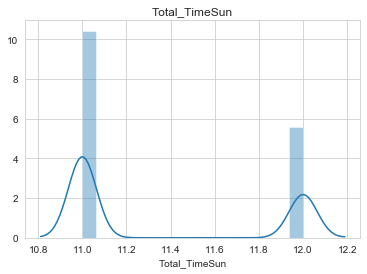



Month
Not-Normal Distribution
Skewness: -0.014396732803281392, Kurtosis -1.3110583082870086


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


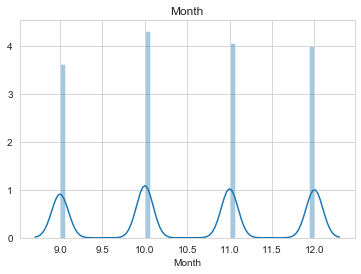



Days
Not-Normal Distribution
Skewness: -0.06103290759579453, Kurtosis -1.1718941919461547


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


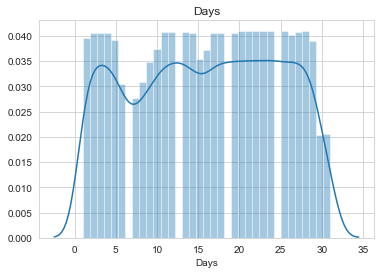



hour
Not-Normal Distribution
Skewness: -0.0027016060087844494, Kurtosis -1.2119318177805842


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


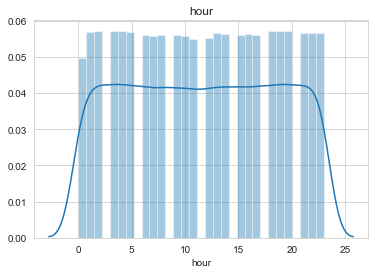

In [15]:
from scipy.stats import shapiro, anderson, skew, kurtosis
for i in data2.select_dtypes(exclude='object').columns:
    print(i)
    if shapiro(data2[i])[1] < 0.05:
        print('Not-Normal Distribution')
    else:
        print('Normal Distribution')
        
    print('Skewness: {}, Kurtosis {}'.format(skew(data2[i]), kurtosis(data2[i])))
    sns.distplot(data2[i])
    plt.title(i)
    plt.show()
    print('\n')

In [16]:
from scipy.stats import levene, bartlett, f_oneway, kruskal
from scipy.stats import mannwhitneyu
varr = []
for i in data2.select_dtypes('number').columns:
    if levene(data2[data2[i] <= data2[i].describe()['50%']]['Radiation'], 
                    data2[data2[i] >= data2[i].describe()['50%']]['Radiation'])[1] < 0.05:
        varr.append('Equal Variance')
    else:
        varr.append('Unequal Variance')

res = pd.DataFrame(data = [list(data2.select_dtypes('number').columns), varr]).T
res.columns = ['Columns', 'Variance']
res

,Columns,Variance
0,Radiation,Equal Variance
1,Temperature,Equal Variance
2,Pressure,Equal Variance
3,Humidity,Equal Variance
4,WindDirection(Degrees),Equal Variance
5,Speed,Equal Variance
6,Total_TimeSun,Equal Variance
7,Month,Equal Variance
8,Days,Equal Variance
9,hour,Equal Variance


In [17]:
mann = []
for i in data2.select_dtypes('number').columns:
    if mannwhitneyu(data2[data2[i] <= data2[i].describe()['50%']]['Radiation'], 
                    data2[data2[i] >= data2[i].describe()['50%']]['Radiation'])[1] < 0.05:
        mann.append('Significant')
    else:
        mann.append('Insignificant')

Sig = pd.DataFrame(data = [list(data2.select_dtypes('number').columns), mann]).T
Sig.columns = ['Columns', 'Significant']
Sig

,Columns,Significant
0,Radiation,Significant
1,Temperature,Significant
2,Pressure,Significant
3,Humidity,Significant
4,WindDirection(Degrees),Significant
5,Speed,Significant
6,Total_TimeSun,Significant
7,Month,Significant
8,Days,Significant
9,hour,Insignificant


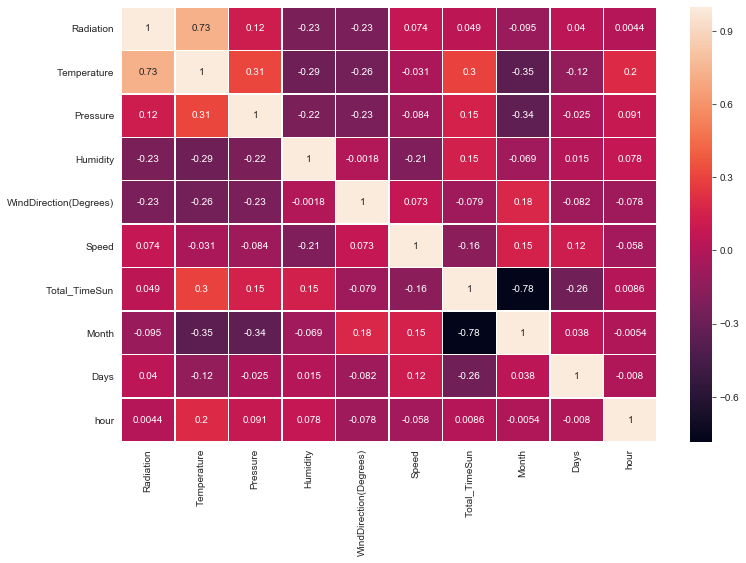

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(data2.corr(), annot=True, linewidths=.5)

## Visualization

In [19]:
def prcntlRange(nm, ttle, st):
    p5 = np.percentile(nm, 5)
    p25 = np.percentile(nm, 25)
    p50 = np.percentile(nm, 50)
    p75 = np.percentile(nm, 75)
    p100 = np.percentile(nm, 100)
    
    lst = []
    
    for vl in nm:
        if vl <= p5:
            lst.append('0'+'-'+str(p5))
        elif (vl > p5) & (vl <= p25):
            lst.append(str(round(p5+0.01,2))+'-'+str(round(p25,2)))
        elif (vl > p25) & (vl <= p50):
            lst.append(str(round(p25+0.01,2))+'-'+str(round(p50,2)))
        elif (vl > p50) & (vl <= p75):
            lst.append(str(round(p50+0.01,2))+'-'+str(round(p75,2)))
        elif (vl > p75) & (vl <= p100):
            lst.append(str(round(p75+0.01,2))+'-'+str(round(p100,2)))
    
    if st == True:
        data2[ttle] = lst 
    else:
        return pd.DataFrame(lst, columns=['x'])
#     print(ttle)
    
    

prcntlRange(data2['Temperature'], 'Temp_range', True)
prcntlRange(data2['Pressure'], 'Pressure_range', True)
prcntlRange(data2['Humidity'], 'Humidity_range', True)
prcntlRange(data2['WindDirection(Degrees)'], 'WindDirec_range',True)
prcntlRange(data2['Speed'], 'Windspd_range',True)

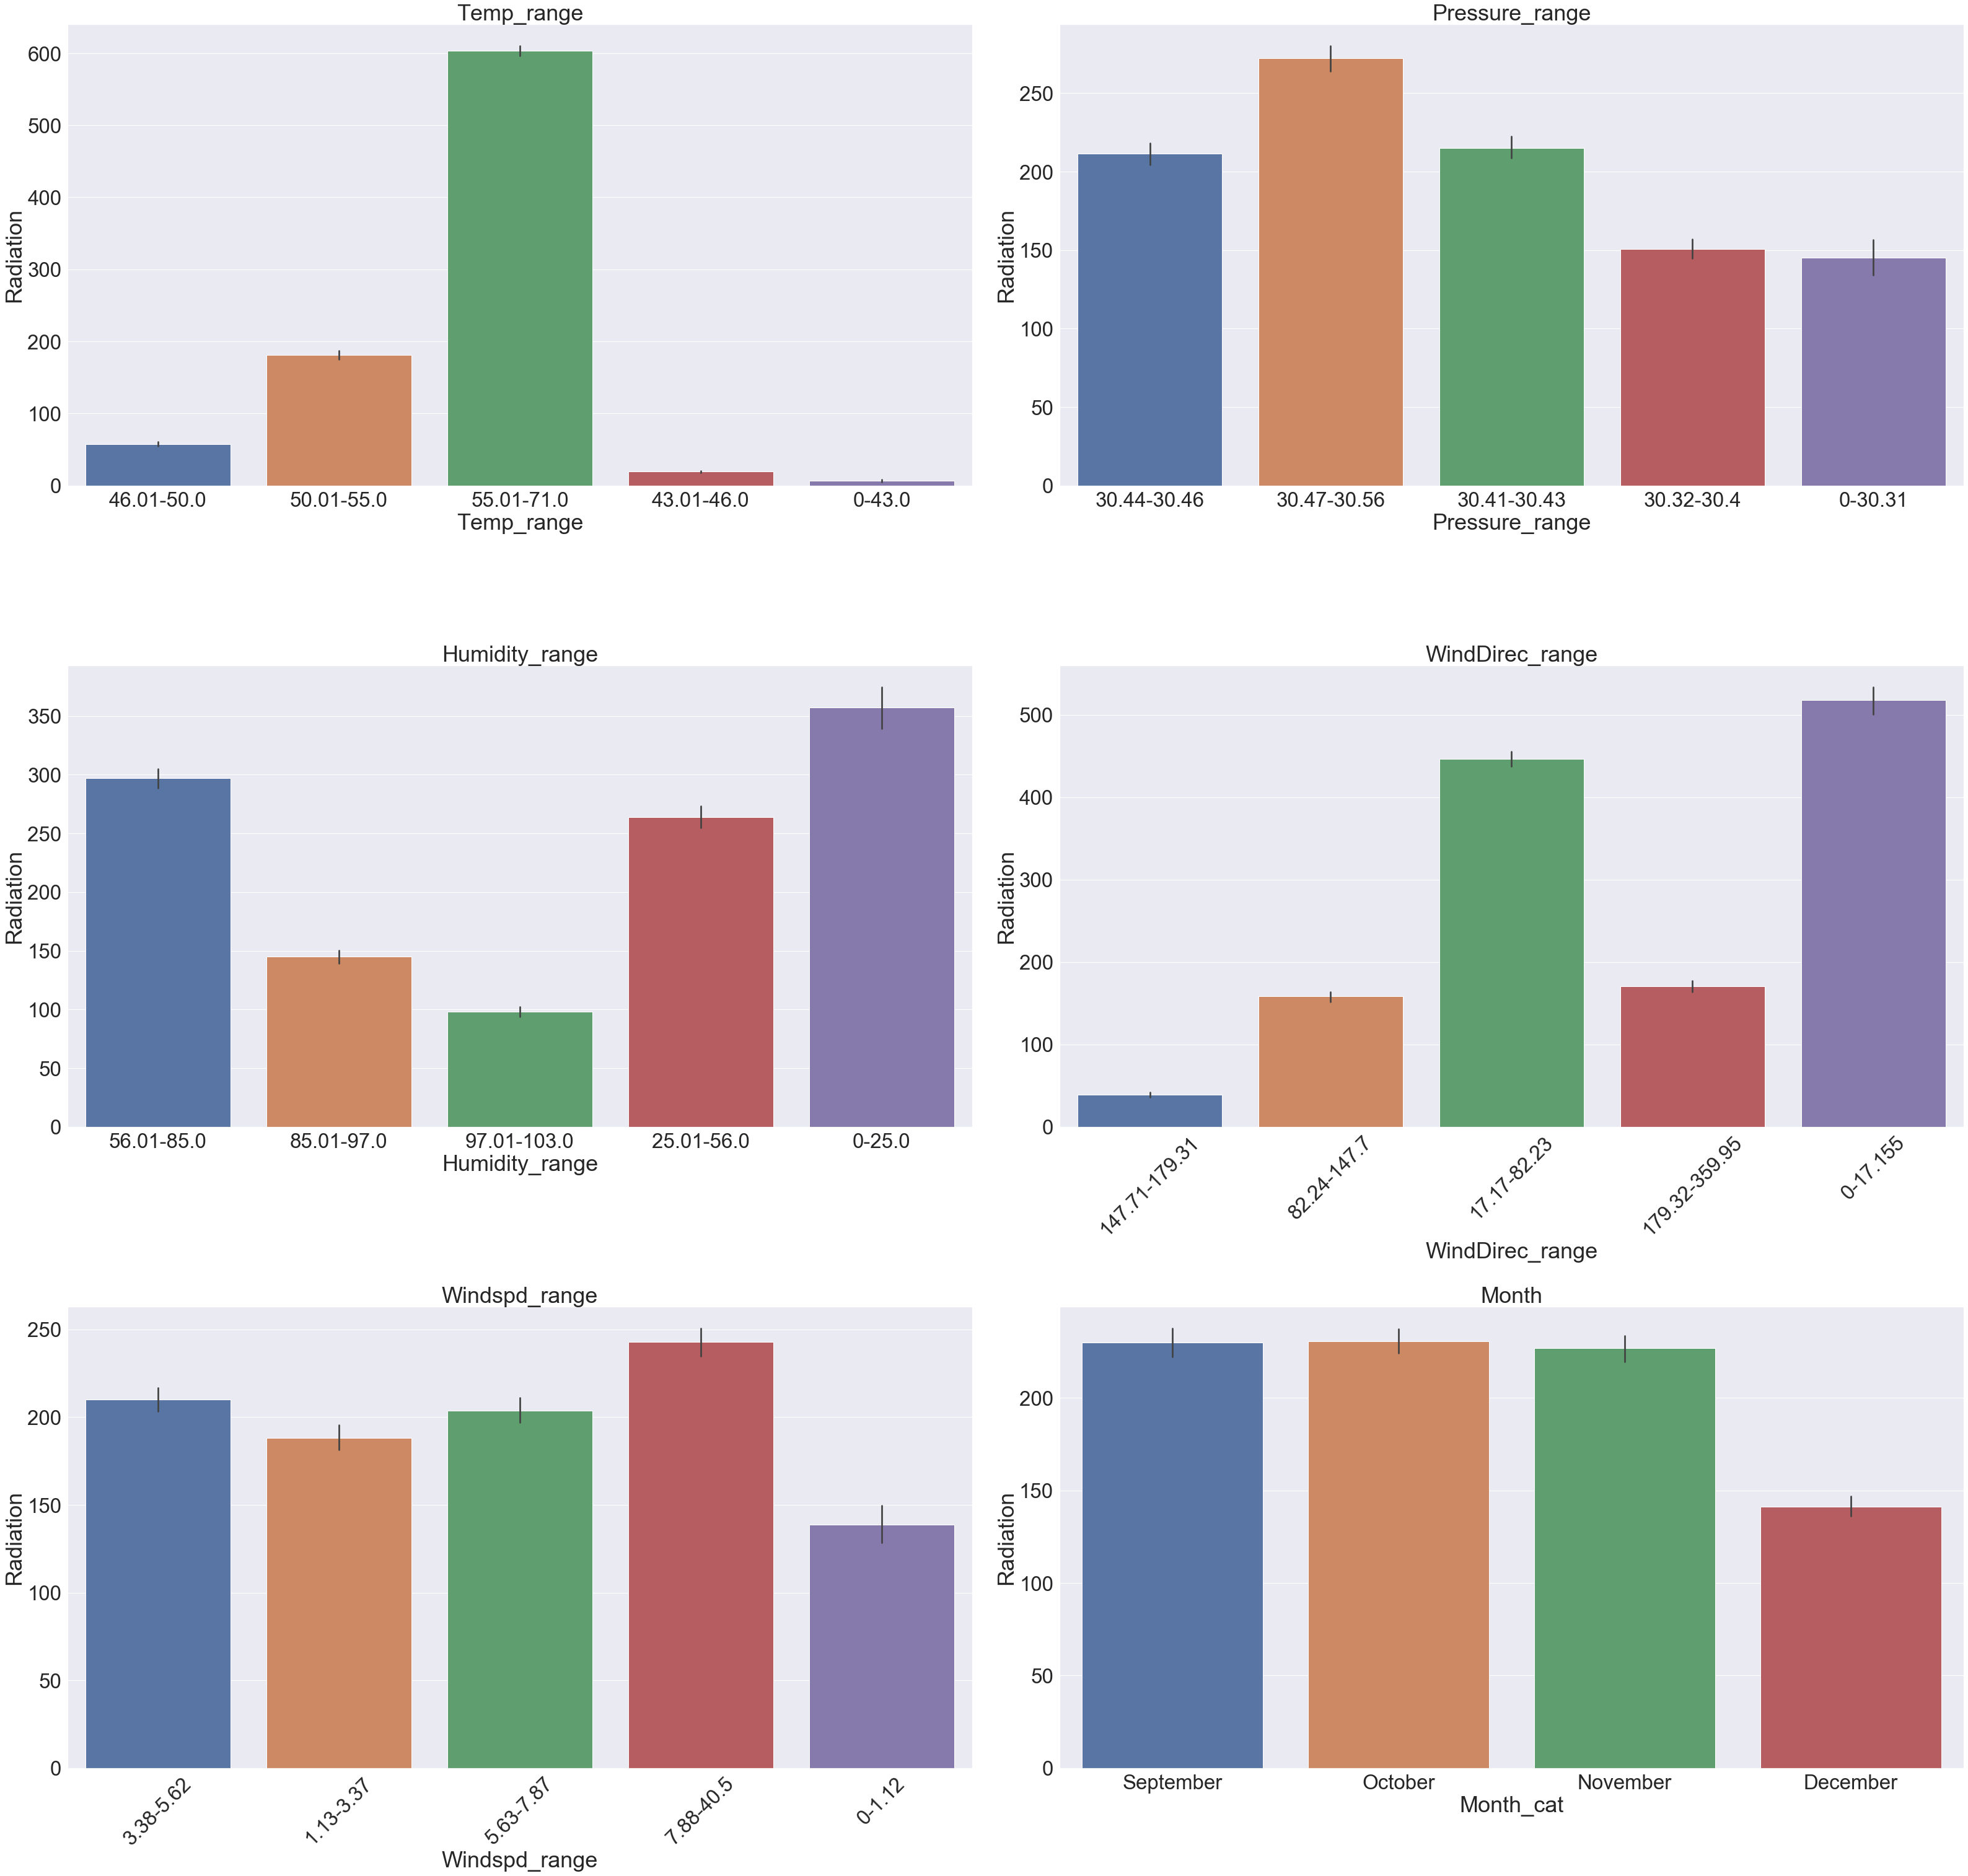

In [20]:
sns.set(font_scale=3)
plt.figure(figsize =(45,55))
plt.subplot(4,2,1)
sns.barplot(data = data2, x = 'Temp_range', y ='Radiation',estimator = np.mean)
plt.title('Temp_range')

plt.subplot(4,2,2)
sns.barplot(data = data2, x = 'Pressure_range', y ='Radiation', estimator = np.mean)
plt.title('Pressure_range')

plt.subplot(4,2,3)
sns.barplot(data = data2, x = 'Humidity_range', y ='Radiation', estimator = np.mean)
plt.title('Humidity_range')

plt.subplot(4,2,4)
sns.barplot(data = data2, x = 'WindDirec_range', y ='Radiation', estimator = np.mean)
# plt.xticklabels(data2['WindDirec_range'], rotation=45)
plt.xticks(rotation=45)
plt.title('WindDirec_range')

plt.subplot(4,2,5)
sns.barplot(data = data2, x = 'Windspd_range', y ='Radiation', estimator = np.mean)
plt.xticks(rotation=45)
plt.title('Windspd_range')

plt.subplot(4,2,6)
sns.barplot(data = data2, x = 'Month_cat', y ='Radiation', estimator = np.mean)
plt.title('Month')
plt.tight_layout()

1. Pada Plot pertama dapat dilihat perbandingan temperature dengan Radiation, dimana semakin tinggi temperature semakin tinggi Radiasi matahari yang di dapat
2. Pada plot kedua dapat dilihat perbandingan Barometric Pressure terhadap Radiation, dimana semakin tinggi pressure semakin tinggi Radiasi matahari yang di dapat
3. Pada plot ketiga dapat dilihat perbandingan Humidity terhadap Radiation, dimana semakin rendah Humidity semakin tinggi Radiasi matahari yang di dapat
4. Pada plot keempat dapat dilihat perbandingan Wind Direction terhadap Radiation, dimana Radiasi matahari lebih meningkat dengan datangnya arah angin dari Utara
5. Pada plot kedua dapat dilihat perbandingan Wind Speed terhadap Radiation, dimana semakin tinggi pressure semakin tinggi Radiasi matahari yang di dapat
6. Pada plot keenam dapat dilihat perbandingan Bulan (September - December) terhadap Radiation, dimana Radiasi matahari yang di dapat lebih tinggi di bulan September, October, dan November. Sedangkan December cenderung rendah dengan asumsi cuaca memasuki musim dingin

#### Analisa pengaruh arah mata angin terhadap Radiasi dan feature lainnya

In [21]:
data.groupby(['direct','Month_cat'])['Radiation','Temperature','Humidity','Speed','Pressure'].agg(['mean','std','min','max']).round(2)

Radiation                        Temperature                \
                      mean     std   min      max        mean   std min max   
direct Month_cat                                                              
East   December     237.96  293.99  1.15  1079.18       50.08  5.34  36  61   
       November     292.06  331.21  1.15  1239.27       51.58  6.15  39  67   
       October      263.95  335.54  1.13  1410.52       52.87  5.37  42  70   
       September    269.71  346.41  1.17  1359.79       55.31  5.28  43  71   
North  December     269.23  292.68  1.16  1157.27       50.69  4.61  37  61   
       November     572.38  304.82  1.15  1154.65       58.21  5.20  41  67   
       October      534.52  350.03  1.19  1451.41       57.96  4.98  43  70   
       September    517.57  380.25  1.20  1601.26       59.25  3.52  45  68   
South  December      46.71  137.94  1.11   986.07       45.63  4.12  35  62   
       November      49.18  155.81  1.14  1038.70       47.21  3.96  38  67   
       October       40.09  133.16  1.13  1112.46       49.17  3.25  42  68   
       September     43.38  152.12  1.15  1266.25       49.50  4.28  41  71   
West   December     152.99  251.30  1.16  1213.55       46.92  4.23  34  60   
       November     270.79  338.66  1.19   943.29       54.82  5.67  41  67   
       October      354.18  343.86  1.19  1276.21       56.05  4.82  44  65   
       September    312.89  365.64  1.20  1073.58       56.29  4.16  46  67   

                 Humidity                 Speed                   Pressure  \
                     mean    std min  max  mean   std  min    max     mean   
direct Month_cat                                                             
East   December     76.89  25.08  17  102  5.83  3.58  0.0  23.62    30.41   
       November     72.33  28.28  12  103  6.75  3.38  0.0  22.50    30.44   
       October      85.00  24.63   8  103  5.65  2.98  0.0  18.00    30.44   
       September    81.09  20.73  16  103  5.16  3.19  0.0  20.25    30.43   
North  December     86.25  16.94  20  103  5.52  3.65  0.0  19.12    30.36   
       November     58.78  27.08  12  103  6.04  3.03  0.0  20.25    30.44   
       October      77.10  24.26  13  103  5.38  2.90  0.0  19.12    30.44   
       September    77.20  19.38  15  103  5.49  2.87  0.0  16.87    30.43   
South  December     75.33  25.44  18  103  7.35  5.02  0.0  40.50    30.39   
       November     57.24  27.96  13  103  7.30  3.10  0.0  27.00    30.45   
       October      74.34  27.90  11  102  6.40  2.70  0.0  15.75    30.44   
       September    79.24  18.96  15  103  5.63  2.38  0.0  19.12    30.43   
West   December     87.52  15.30  26  103  7.37  4.82  0.0  38.25    30.32   
       November     47.88  29.76  11  102  5.80  2.49  0.0  12.37    30.45   
       October      81.36  20.69  29  102  4.12  2.85  0.0  14.62    30.43   
       September    87.12  14.80  29  103  5.20  3.40  0.0  20.25    30.44   

                                      
                   std    min    max  
direct Month_cat                      
East   December   0.06  30.20  30.56  
       November   0.03  30.38  30.52  
       October    0.03  30.37  30.54  
       September  0.03  30.35  30.52  
North  December   0.07  30.20  30.56  
       November   0.03  30.38  30.53  
       October    0.03  30.37  30.54  
       September  0.04  30.35  30.53  
South  December   0.08  30.19  30.56  
       November   0.03  30.38  30.51  
       October    0.03  30.37  30.54  
       September  0.03  30.34  30.51  
West   December   0.05  30.19  30.51  
       November   0.02  30.39  30.49  
       October    0.02  30.37  30.50  
       September  0.03  30.38  30.52

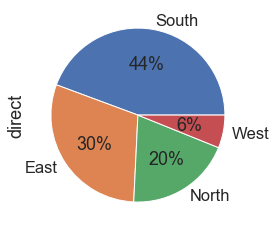

In [22]:
sns.set(font_scale=1.5)
data2['direct'].value_counts().plot(kind='pie', autopct='%1.0f%%')

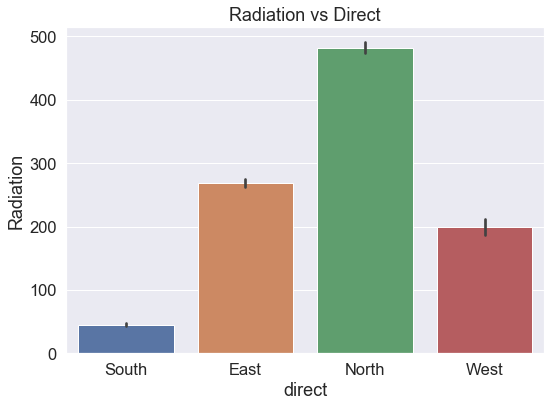

In [23]:
plt.figure(figsize= (8,6))
sns.barplot(data= data, x = 'direct', y = 'Radiation')
plt.title('Radiation vs Direct')
plt.tight_layout()

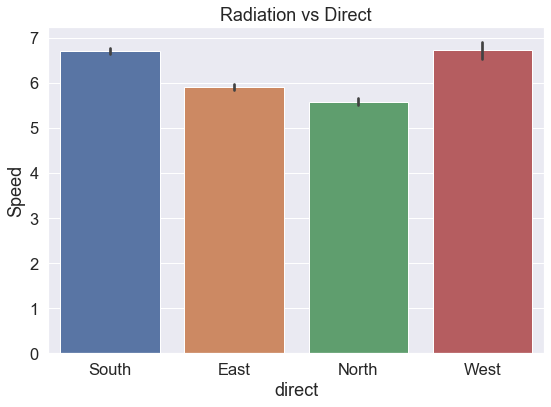

In [24]:
plt.figure(figsize= (8,6))
sns.barplot(data= data, x = 'direct', y = 'Speed')
plt.title('Radiation vs Direct')
plt.tight_layout()

### Analisa Radiation, Temperature, Humidity, dan Wind Speed setiap bulannya

In [25]:
data2.groupby(['Month_cat','direct'])['Radiation','Temperature','Humidity','Speed','Pressure'].agg(['mean','std','min','max']).round(2)

Radiation                        Temperature                \
                      mean     std   min      max        mean   std min max   
Month_cat direct                                                              
December  East      237.96  293.99  1.15  1079.18       50.08  5.34  36  61   
          North     269.23  292.68  1.16  1157.27       50.69  4.61  37  61   
          South      46.71  137.94  1.11   986.07       45.63  4.12  35  62   
          West      152.99  251.30  1.16  1213.55       46.92  4.23  34  60   
November  East      292.06  331.21  1.15  1239.27       51.58  6.15  39  67   
          North     572.38  304.82  1.15  1154.65       58.21  5.20  41  67   
          South      49.18  155.81  1.14  1038.70       47.21  3.96  38  67   
          West      270.79  338.66  1.19   943.29       54.82  5.67  41  67   
October   East      263.95  335.54  1.13  1410.52       52.87  5.37  42  70   
          North     534.52  350.03  1.19  1451.41       57.96  4.98  43  70   
          South      40.09  133.16  1.13  1112.46       49.17  3.25  42  68   
          West      354.18  343.86  1.19  1276.21       56.05  4.82  44  65   
September East      269.71  346.41  1.17  1359.79       55.31  5.28  43  71   
          North     517.57  380.25  1.20  1601.26       59.25  3.52  45  68   
          South      43.38  152.12  1.15  1266.25       49.50  4.28  41  71   
          West      312.89  365.64  1.20  1073.58       56.29  4.16  46  67   

                 Humidity                 Speed                   Pressure  \
                     mean    std min  max  mean   std  min    max     mean   
Month_cat direct                                                             
December  East      76.89  25.08  17  102  5.83  3.58  0.0  23.62    30.41   
          North     86.25  16.94  20  103  5.52  3.65  0.0  19.12    30.36   
          South     75.33  25.44  18  103  7.35  5.02  0.0  40.50    30.39   
          West      87.52  15.30  26  103  7.37  4.82  0.0  38.25    30.32   
November  East      72.33  28.28  12  103  6.75  3.38  0.0  22.50    30.44   
          North     58.78  27.08  12  103  6.04  3.03  0.0  20.25    30.44   
          South     57.24  27.96  13  103  7.30  3.10  0.0  27.00    30.45   
          West      47.88  29.76  11  102  5.80  2.49  0.0  12.37    30.45   
October   East      85.00  24.63   8  103  5.65  2.98  0.0  18.00    30.44   
          North     77.10  24.26  13  103  5.38  2.90  0.0  19.12    30.44   
          South     74.34  27.90  11  102  6.40  2.70  0.0  15.75    30.44   
          West      81.36  20.69  29  102  4.12  2.85  0.0  14.62    30.43   
September East      81.09  20.73  16  103  5.16  3.19  0.0  20.25    30.43   
          North     77.20  19.38  15  103  5.49  2.87  0.0  16.87    30.43   
          South     79.24  18.96  15  103  5.63  2.38  0.0  19.12    30.43   
          West      87.12  14.80  29  103  5.20  3.40  0.0  20.25    30.44   

                                      
                   std    min    max  
Month_cat direct                      
December  East    0.06  30.20  30.56  
          North   0.07  30.20  30.56  
          South   0.08  30.19  30.56  
          West    0.05  30.19  30.51  
November  East    0.03  30.38  30.52  
          North   0.03  30.38  30.53  
          South   0.03  30.38  30.51  
          West    0.02  30.39  30.49  
October   East    0.03  30.37  30.54  
          North   0.03  30.37  30.54  
          South   0.03  30.37  30.54  
          West    0.02  30.37  30.50  
September East    0.03  30.35  30.52  
          North   0.04  30.35  30.53  
          South   0.03  30.34  30.51  
          West    0.03  30.38  30.52

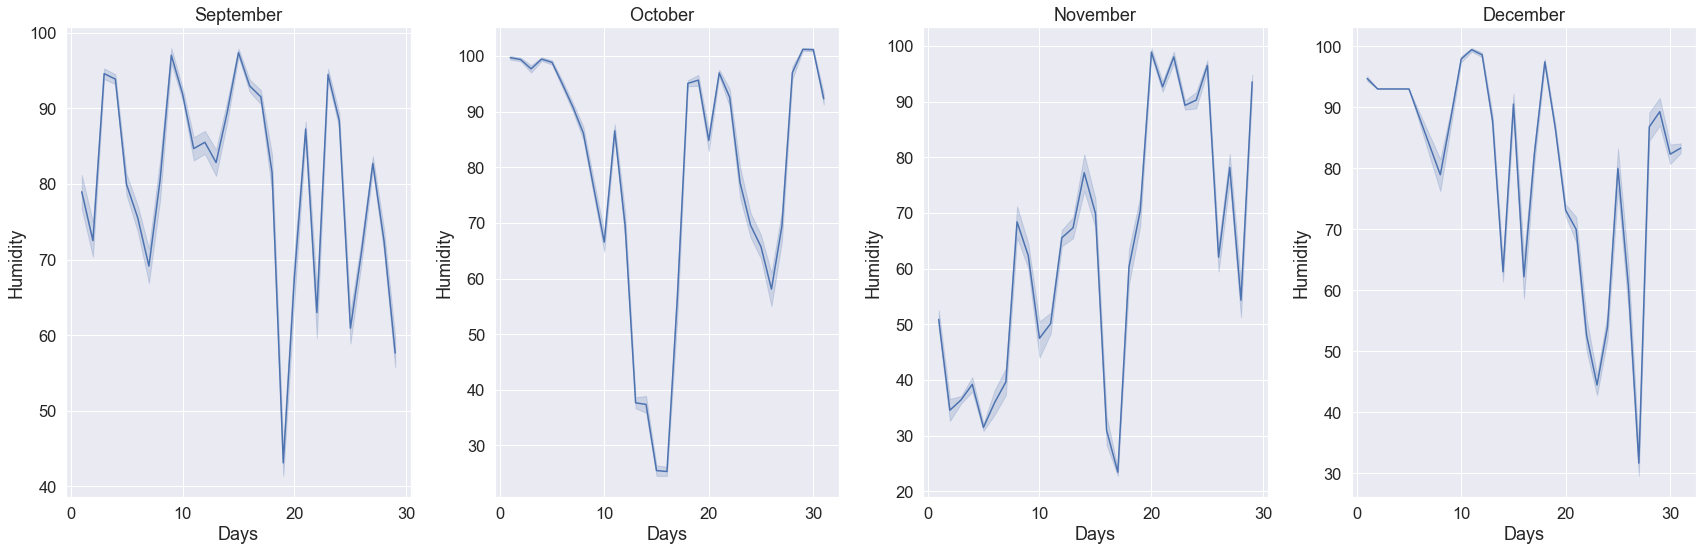

In [66]:
sep = data2[data2['Month_cat'] == 'September']
okt = data2[data2['Month_cat'] == 'October']
nov = data2[data2['Month_cat'] == 'November']
des = data2[data2['Month_cat'] == 'December']
plt.figure(figsize =(24,8))

plt.subplot(1,4,1)
sns.lineplot(x="Days", y="Humidity",markers=True, dashes=False, data=sep)
plt.title('September')

plt.subplot(1,4,2)
sns.lineplot(x="Days", y="Humidity",markers=True, dashes=False, data=okt)
plt.title('October  ')

plt.subplot(1,4,3)
sns.lineplot(x="Days", y="Humidity",markers=True, dashes=False, data=nov)
plt.title('November')

plt.subplot(1,4,4)
sns.lineplot(x="Days", y="Humidity",markers=True, dashes=False, data=des)
plt.title('December')

plt.tight_layout()

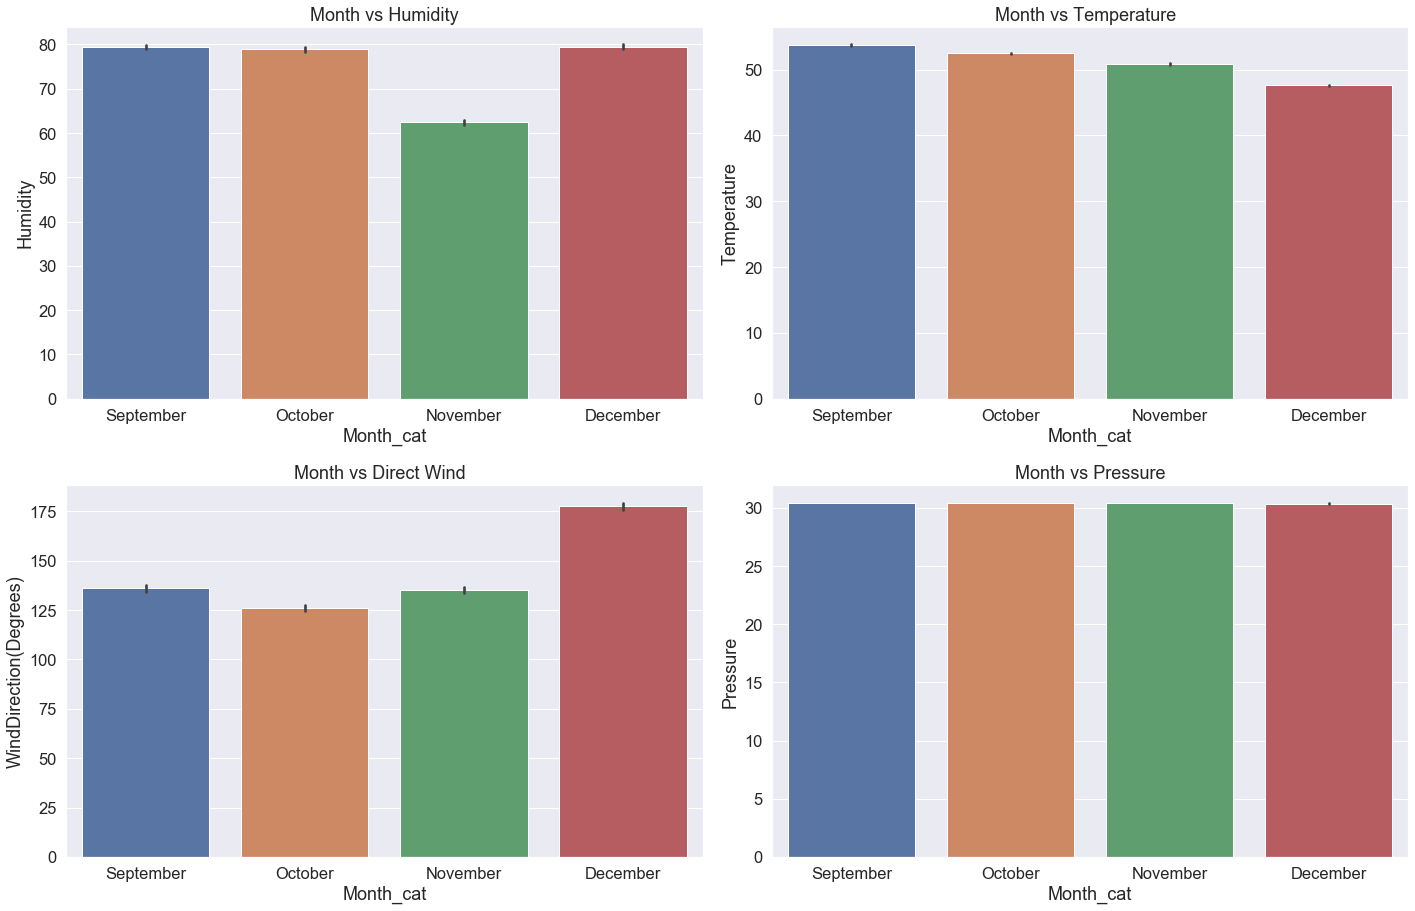

In [27]:
plt.figure(figsize =(20,13))

plt.subplot(2,2,1)
sns.barplot(data= data2, x = 'Month_cat', y = 'Humidity')
plt.title('Month vs Humidity')

plt.subplot(2,2,2)
sns.barplot(data= data2, x = 'Month_cat', y = 'Temperature')
plt.title('Month vs Temperature  ')

plt.subplot(2,2,3)
sns.barplot(data= data2, x = 'Month_cat', y = 'WindDirection(Degrees)')
plt.title('Month vs Direct Wind  ')

plt.subplot(2,2,4)
sns.barplot(data= data2, x = 'Month_cat', y = 'Pressure')
plt.title('Month vs Pressure')

plt.tight_layout()

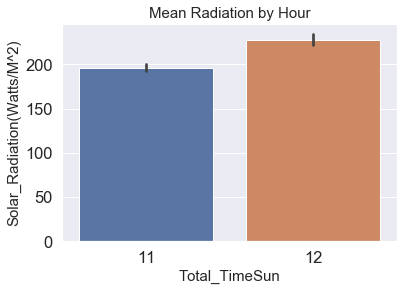

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(x="Total_TimeSun", y='Radiation', data=data2)
plt.title('Mean Radiation by Hour',fontsize=15)
plt.ylabel('Solar_Radiation(Watts/M^2)',fontsize=15)
plt.xlabel('Total_TimeSun',fontsize=15)
plt.show()

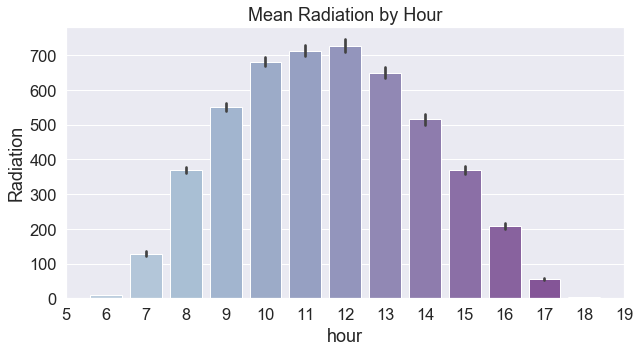

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(data=data2, x='hour',y='Radiation', palette='BuPu')
plt.title('Mean Radiation by Hour')
plt.xlim(5,19)
plt.show()

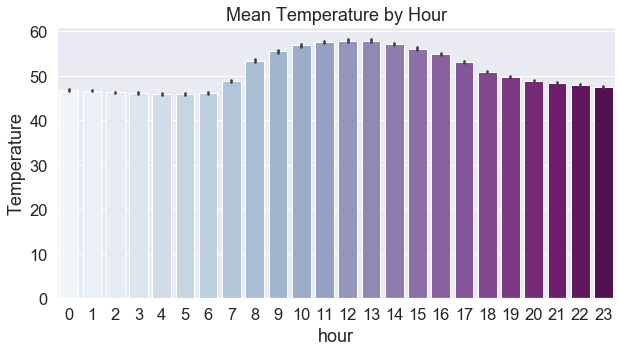

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=data2, x='hour',y='Temperature', palette='BuPu')
plt.title('Mean Temperature by Hour')
plt.show()
plt.tight_layout()

Text(0.5, 0.98, 'Temp vs. Radiation')

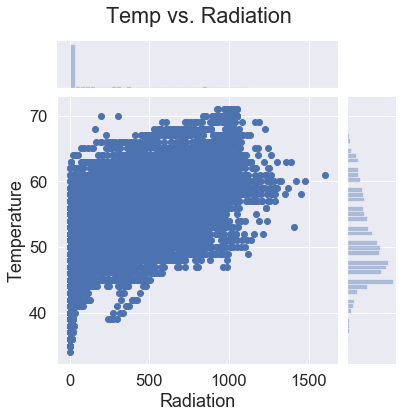

In [31]:
g = sns.jointplot(x="Radiation", y="Temperature", data=data2)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs. Radiation')

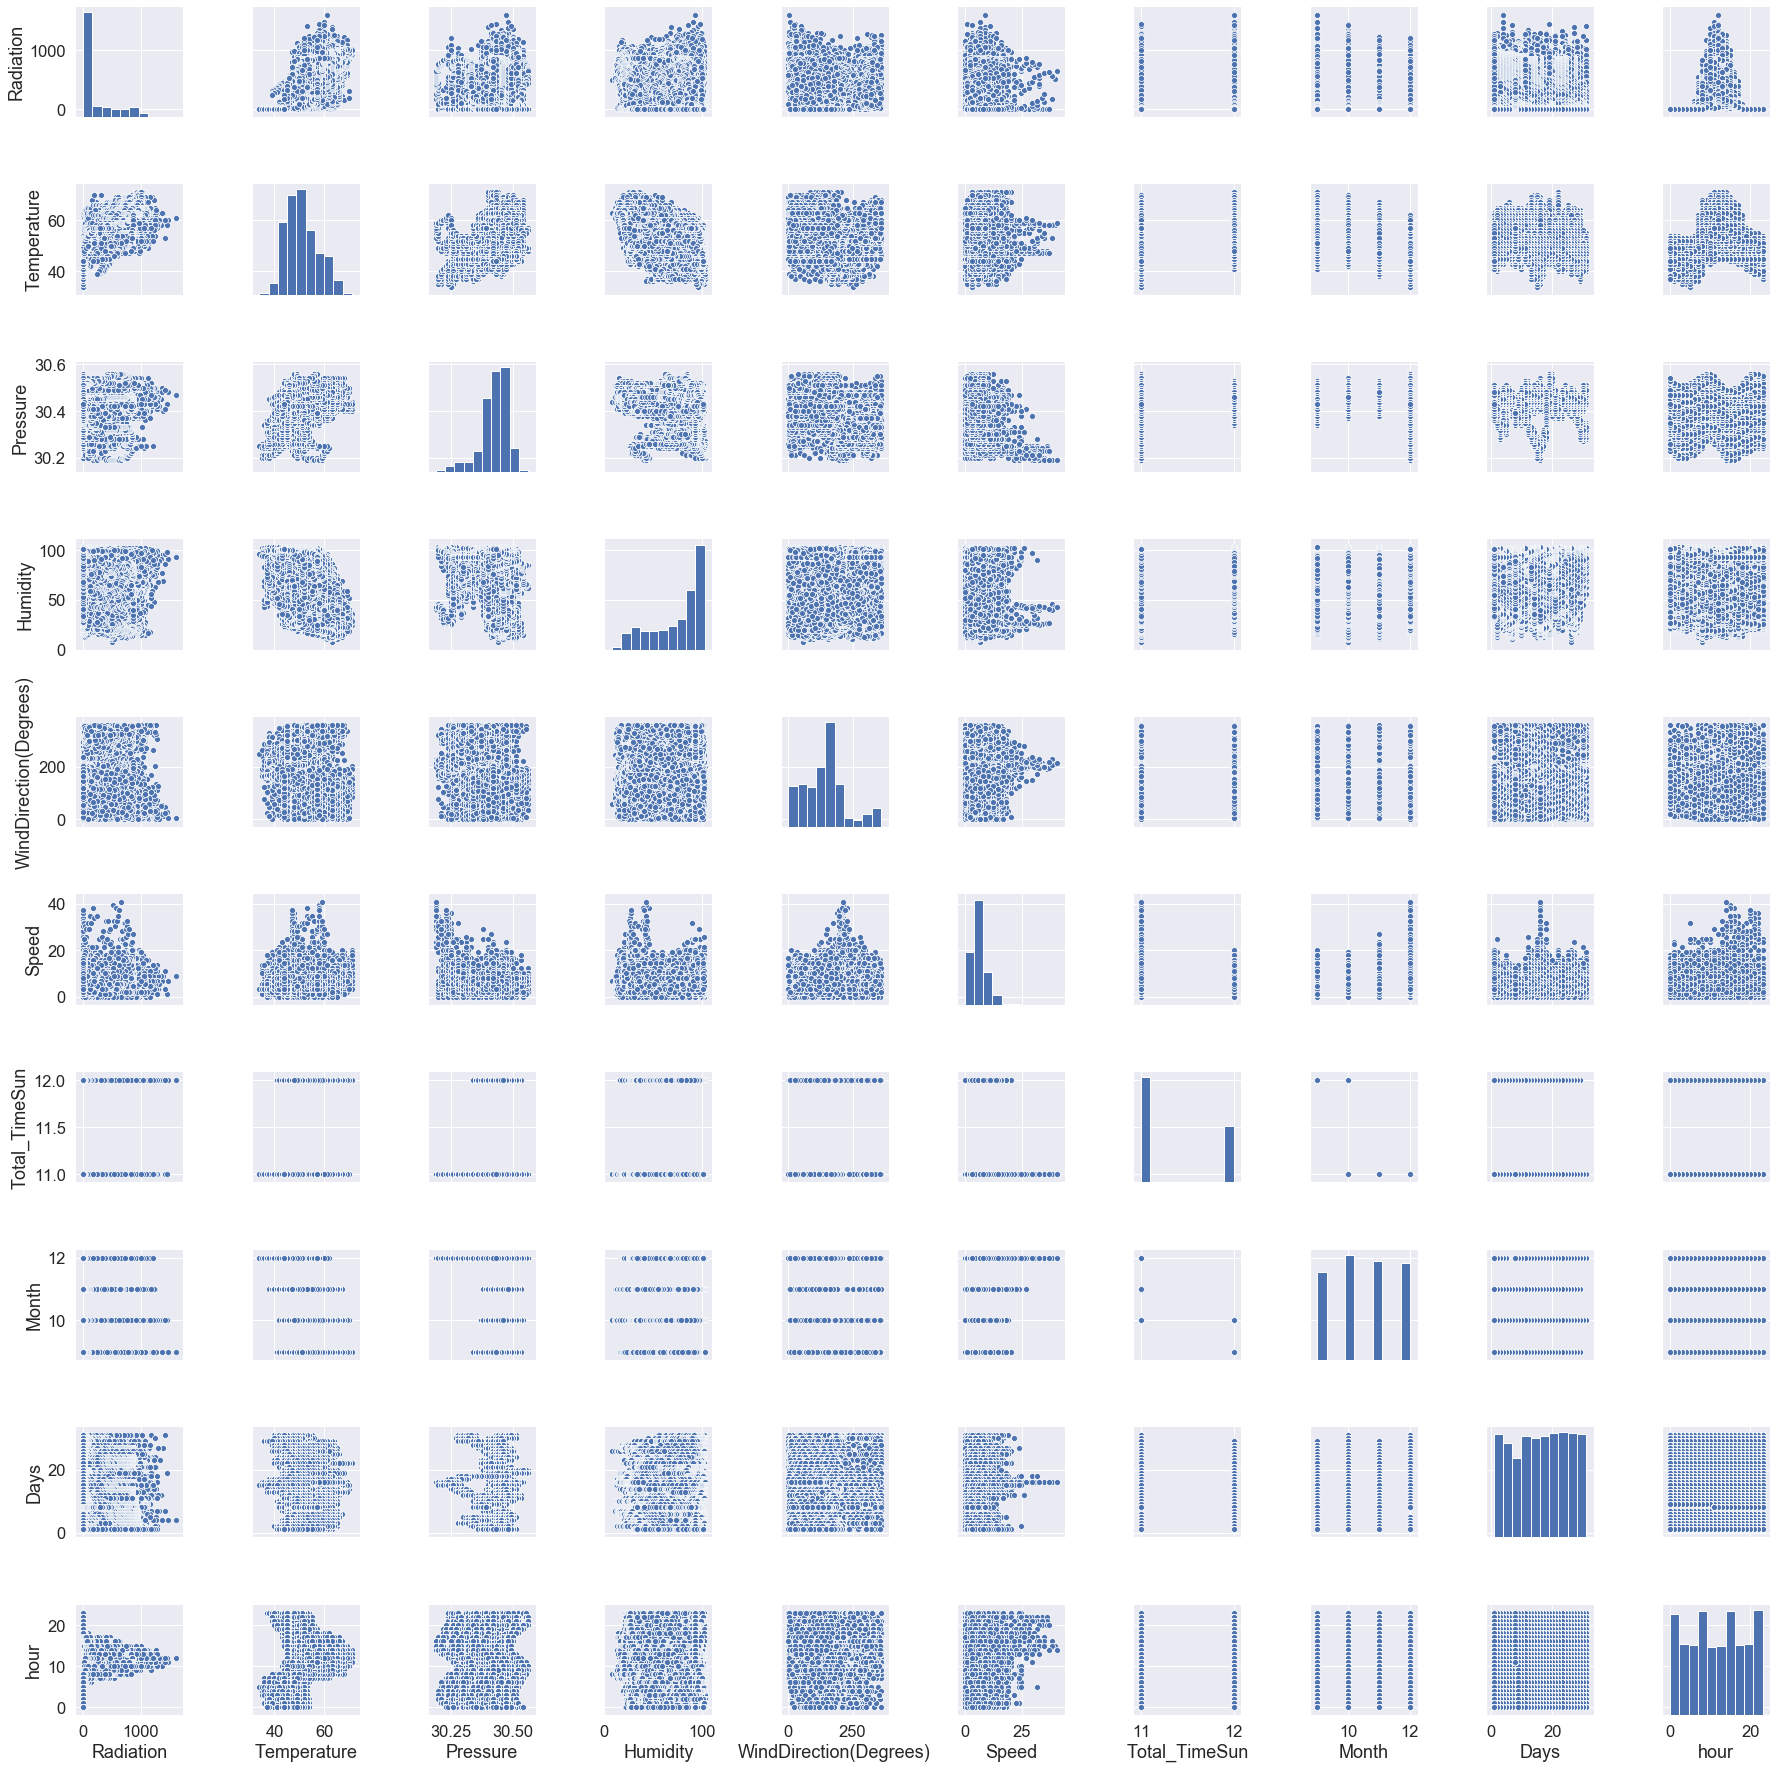

In [32]:
sns.pairplot(data2)

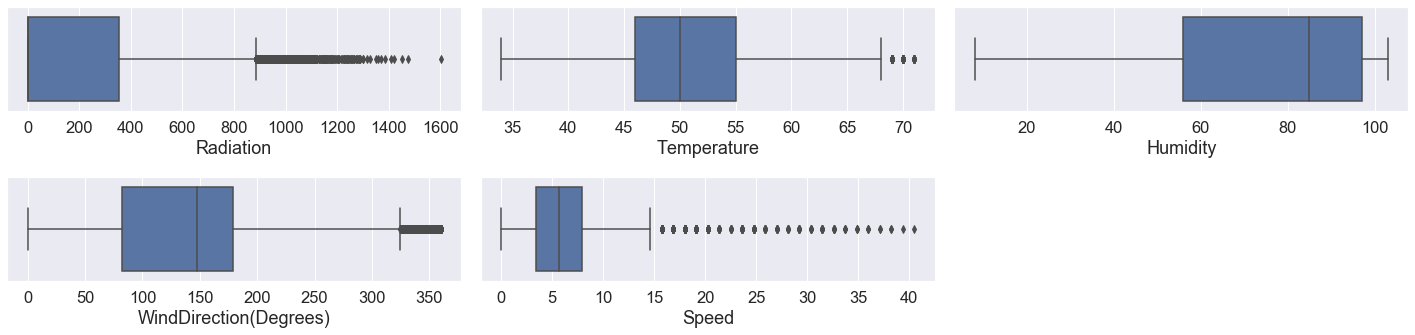

In [33]:
fig2 = plt.figure('Boxplot', figsize = (20,5))
plt.subplot(231)
sns.boxplot(data2['Radiation'])
plt.subplot(232)
sns.boxplot(data2['Temperature'])
plt.subplot(233)
sns.boxplot(data2['Humidity'])
plt.subplot(234)
sns.boxplot(data2['WindDirection(Degrees)'])
plt.subplot(235)
sns.boxplot(data2['Speed']);
plt.tight_layout()

### Disini saya melihat Data Radiation yang akan saya gunakan sebagai target project saya memiliki outlier yang cukup tinggi bila dilihat secara visual, maka dari itu saya ingin menganalisa terlebih dahulu outlier yang ada di target project saya. 

In [34]:
data2['Radiation'].describe()

count    32686.000000
mean       207.124697
std        315.916387
min          1.110000
25%          1.230000
50%          2.660000
75%        354.235000
max       1601.260000
Name: Radiation, dtype: float64

In [35]:
Q1 = data2['Radiation'].describe()['25%']
Q3 = data2['Radiation'].describe()['75%']
IQR = Q3 - Q1

Q1_new = Q1 - (1.5*IQR)
Q3_new = Q3 + (1.5*IQR)

data_outlier = data2[(data2['Radiation']>Q3_new)]
data_clean_outlier = data2[((data2['Radiation']>Q1_new) & (data2['Radiation']<(Q3_new)))]

In [36]:
display(data_outlier.describe())
display(data_clean_outlier.describe())

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Total_TimeSun,Month,Days,hour
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,979.732015,61.361323,30.441420,59.127735,103.148132,6.952580,11.539440,9.886005,15.481934,11.688041
std,81.016824,4.050185,0.037052,22.510768,115.840081,3.155462,0.498569,0.825530,8.368627,1.143424
min,883.800000,47.000000,30.240000,14.000000,0.100000,0.000000,11.000000,9.000000,1.000000,9.000000
25%,920.030000,59.000000,30.420000,40.000000,26.870000,4.500000,11.000000,9.000000,9.000000,11.000000
50%,962.390000,62.000000,30.440000,59.000000,52.400000,6.750000,12.000000,10.000000,16.000000,12.000000
75%,1021.430000,64.000000,30.460000,78.000000,116.870000,9.000000,12.000000,10.000000,22.000000,13.000000
max,1601.260000,71.000000,30.540000,102.000000,359.930000,20.250000,12.000000,12.000000,31.000000,15.000000


,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Total_TimeSun,Month,Days,hour
count,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000
mean,157.706600,50.447121,30.421693,76.032584,146.070187,6.198538,11.335634,10.567006,15.847759,11.549071
std,255.231598,5.718734,0.055400,25.867390,79.941268,3.505990,0.472219,1.099188,8.732987,7.123726
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,11.000000,9.000000,1.000000,0.000000
25%,1.230000,46.000000,30.400000,57.000000,90.830000,3.370000,11.000000,10.000000,9.000000,5.000000
50%,1.930000,49.000000,30.430000,87.000000,150.640000,5.620000,11.000000,11.000000,16.000000,11.000000
75%,250.530000,54.000000,30.460000,98.000000,179.740000,7.870000,12.000000,12.000000,23.000000,18.000000
max,883.660000,70.000000,30.560000,103.000000,359.950000,40.500000,12.000000,12.000000,31.000000,23.000000


1. Berdasarkan Describe Data Outlier secara keseluruhan memiliki standart nilai radiation  yang dibutuhkan untuk mengoptimalkan kinerja solar panel yaitu +- 1000 W/m2. Dengan waktu pemanasan lebih optimal dari jam 9 pagi sampai 15.00 siang.

Untuk memperjelas saya angka menganalisa hypothesa saya menggunakan tes statisk dengan perbandingan antara < 50% dan > 50%, Berikut analisanya : 

## Hypothesis Data Outlier

Radiation
Not-Normal Distribution
Skewness: 1.8460673807146797, Kurtosis 5.964176362476145


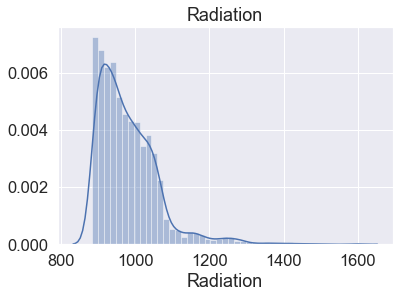

Temperature
Not-Normal Distribution
Skewness: -0.529962368435105, Kurtosis 0.6302631944514037


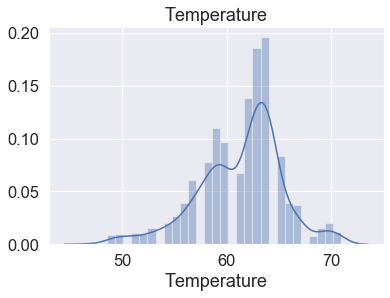

Pressure
Not-Normal Distribution
Skewness: -1.394665622356142, Kurtosis 6.690156151616771


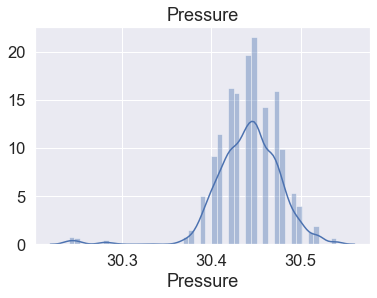

Humidity
Not-Normal Distribution
Skewness: -0.05067610063092346, Kurtosis -1.0075217610941458


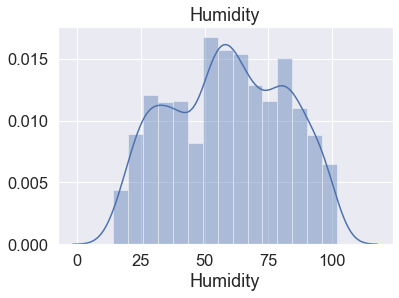

WindDirection(Degrees)
Not-Normal Distribution
Skewness: 1.3389641117407443, Kurtosis 0.24422906410221934


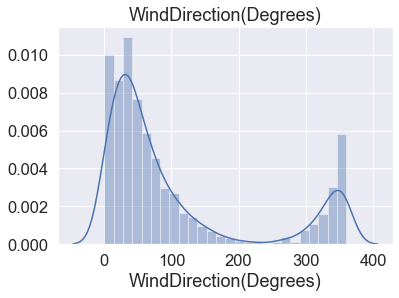

Speed
Not-Normal Distribution
Skewness: 0.5738894356457985, Kurtosis 0.3533326213454693


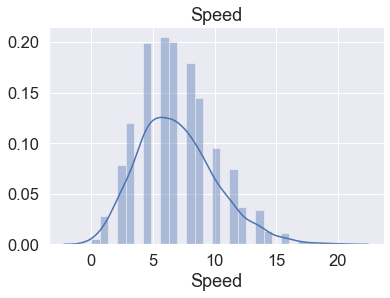

Total_TimeSun
Not-Normal Distribution
Skewness: -0.15825391981781978, Kurtosis -1.9749556968622954


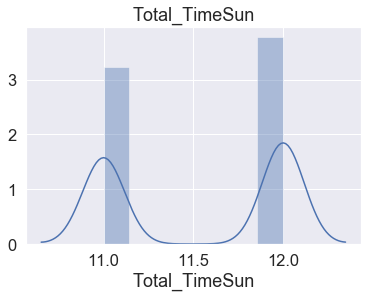

Month
Not-Normal Distribution
Skewness: 0.49123225595451875, Kurtosis -0.67604860085472


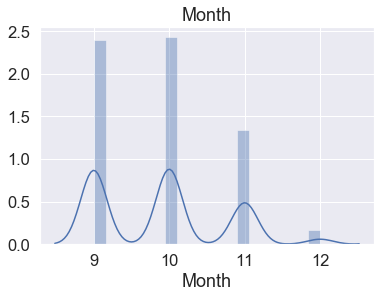

Days
Not-Normal Distribution
Skewness: -0.14399065958150425, Kurtosis -1.132953887222569


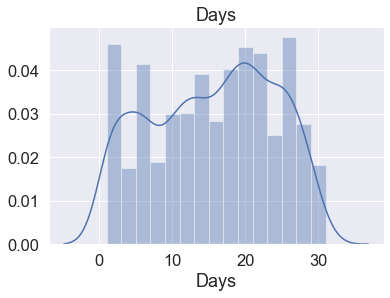

hour
Not-Normal Distribution
Skewness: 0.1355140158660352, Kurtosis -0.6583101071473556


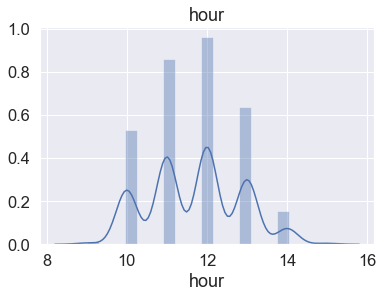

In [37]:
from scipy.stats import shapiro, anderson, skew, kurtosis
for i in data_outlier.select_dtypes(exclude='object').columns:
    print(i)
    if shapiro(data_outlier[i])[1] < 0.05:
        print('Not-Normal Distribution')
    else:
        print('Normal Distribution')
        
    print('Skewness: {}, Kurtosis {}'.format(skew(data_outlier[i]), kurtosis(data_outlier[i])))
    sns.distplot(data_outlier[i])
    plt.title(i)
    plt.show()

In [38]:
from scipy.stats import levene, bartlett, f_oneway, kruskal
from scipy.stats import mannwhitneyu
var_out = []
for i in data_outlier.select_dtypes('number').columns:
    if levene(data_outlier[data_outlier[i] <= data_outlier[i].describe()['50%']]['Radiation'], 
                    data_outlier[data_outlier[i] >= data_outlier[i].describe()['50%']]['Radiation'])[1] < 0.05:
        var_out.append('Equal Variance')
    else:
        var_out.append('Unequal Variance')

res_out = pd.DataFrame(data = [list(data_outlier.select_dtypes('number').columns), var_out]).T
res_out.columns = ['Columns', 'Variance']
res_out

,Columns,Variance
0,Radiation,Equal Variance
1,Temperature,Equal Variance
2,Pressure,Unequal Variance
3,Humidity,Equal Variance
4,WindDirection(Degrees),Unequal Variance
5,Speed,Unequal Variance
6,Total_TimeSun,Unequal Variance
7,Month,Equal Variance
8,Days,Equal Variance
9,hour,Unequal Variance


In [39]:
mann_out = []
for i in data_outlier.select_dtypes('number').columns:
    if mannwhitneyu(data_outlier[data_outlier[i] <= data_outlier[i].describe()['50%']]['Radiation'], 
                    data_outlier[data_outlier[i] >= data_outlier[i].describe()['50%']]['Radiation'])[1] < 0.05:
        mann_out.append('Significant')
    else:
        mann_out.append('Insignificant')

Sig_out = pd.DataFrame(data = [list(data_outlier.select_dtypes('number').columns), mann_out]).T
Sig_out.columns = ['Columns', 'Significant']
Sig_out

,Columns,Significant
0,Radiation,Significant
1,Temperature,Insignificant
2,Pressure,Significant
3,Humidity,Significant
4,WindDirection(Degrees),Insignificant
5,Speed,Insignificant
6,Total_TimeSun,Significant
7,Month,Significant
8,Days,Insignificant
9,hour,Insignificant


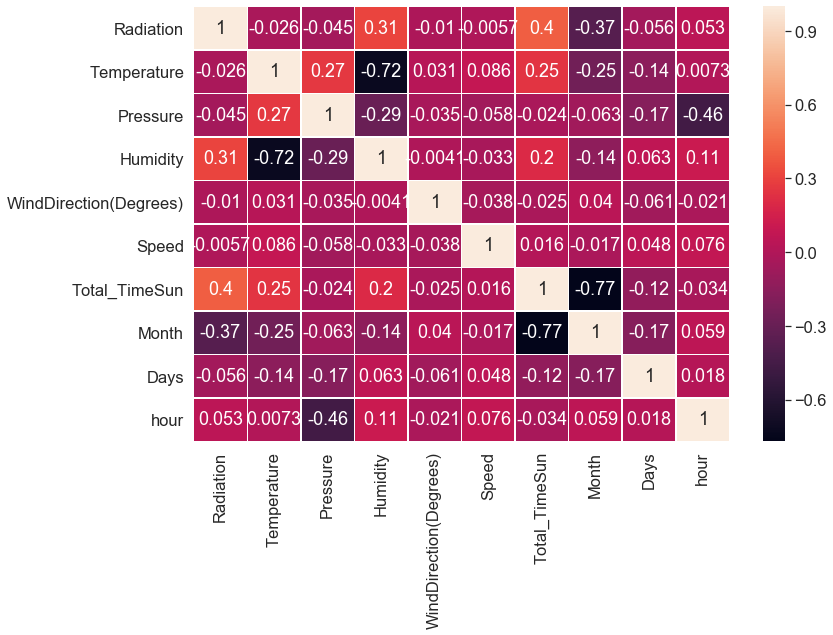

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(data_outlier.corr(), annot=True, linewidths=.5)

#### Kesimpulan :
1. Berdasarkan analisa yang saya dapat Feature yang awalnya memiliki pengaruh yang tinggi seperti temperature, Wind Direction, dan Wind speed ternyata memiliki pengaruh yang tidak signifikan , dikarenakan ketiga feature diatas sudah memiliki nilai yang stabil dan sesuai dengan standart yang dibutuhkan untuk menghasilkan Radiation yang dibutuhkan.
2. Sedangkan untuk Humidity memiliki pengaruh yang sangat tinggi terhadap nilai radiation. Karena pada jam 9 pagi - 15 sore, dimana matahari sedang berada pada puncak panasnya, dan untuk mengurangi radiasi matahari yang berlebih di butuhkan pengaruh humidity untuk menjaga kestabilan suhu.  

## Hyphotesis Data Clean Outlier

Radiation
Not-Normal Distribution
Skewness: 1.5149579586017763, Kurtosis 0.9380660754028587


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


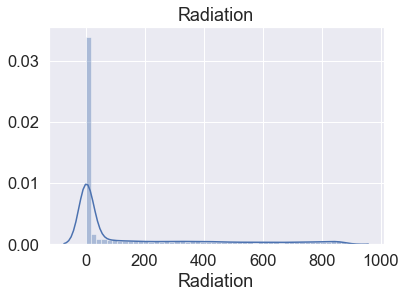

Temperature
Not-Normal Distribution
Skewness: 0.5242391406625875, Kurtosis -0.14410644436039766


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


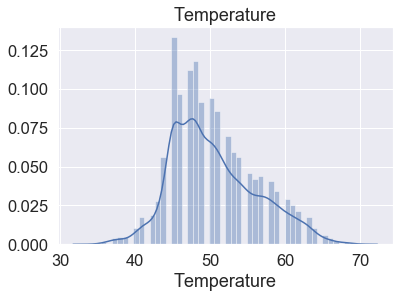

Pressure
Not-Normal Distribution
Skewness: -1.1948712859172976, Kurtosis 1.9532229421771277


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


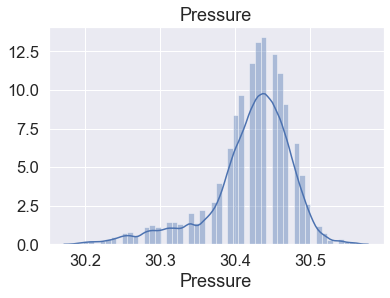

Humidity
Not-Normal Distribution
Skewness: -0.8494686238941555, Kurtosis -0.6338364508999668


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


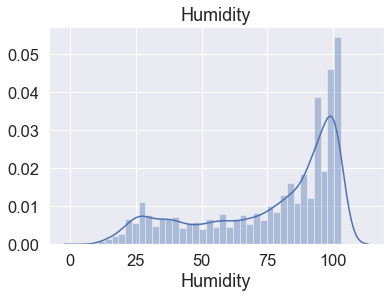

WindDirection(Degrees)
Not-Normal Distribution
Skewness: 0.5353798902552509, Kurtosis 0.35395178180689735


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


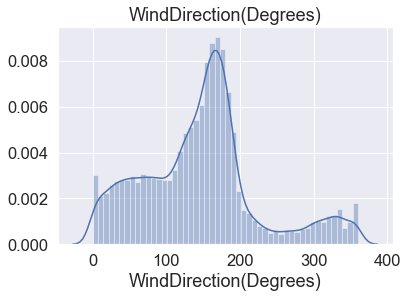

Speed
Not-Normal Distribution
Skewness: 1.5232057086301132, Kurtosis 6.969559479202706


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


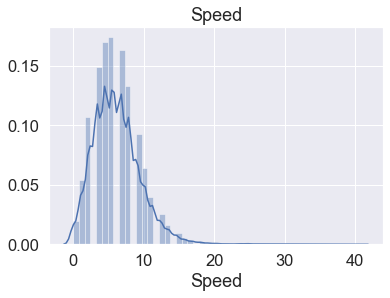

Total_TimeSun
Not-Normal Distribution
Skewness: 0.6961558490716391, Kurtosis -1.5153670338033454


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


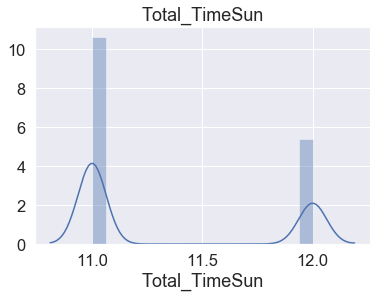

Month
Not-Normal Distribution
Skewness: -0.06467848309067711, Kurtosis -1.3149690194766424


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


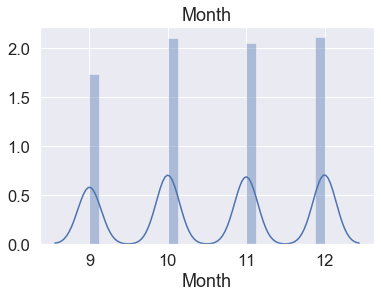

Days
Not-Normal Distribution
Skewness: -0.056983783184421245, Kurtosis -1.175635964856359


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


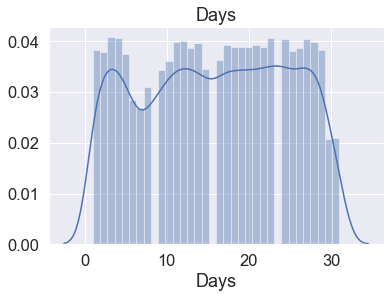

hour
Not-Normal Distribution
Skewness: 0.0007658664266501092, Kurtosis -1.3139181722958797


C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


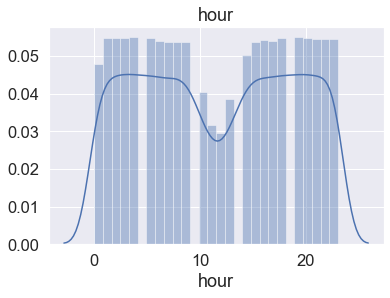

In [41]:
from scipy.stats import shapiro, anderson, skew, kurtosis
for i in data_clean_outlier.select_dtypes(exclude='object').columns:
    print(i)
    if shapiro(data_clean_outlier[i])[1] < 0.05:
        print('Not-Normal Distribution')
    else:
        print('Normal Distribution')
        
    print('Skewness: {}, Kurtosis {}'.format(skew(data_clean_outlier[i]), kurtosis(data_clean_outlier[i])))
    sns.distplot(data_clean_outlier[i])
    plt.title(i)
    plt.show()

In [42]:
from scipy.stats import levene, bartlett, f_oneway, kruskal
from scipy.stats import mannwhitneyu
var_out_clean = []
for i in data_clean_outlier.select_dtypes('number').columns:
    if levene(data_clean_outlier[data_clean_outlier[i] <= data_clean_outlier[i].describe()['50%']]['Radiation'], 
                    data_clean_outlier[data_clean_outlier[i] >= data_clean_outlier[i].describe()['50%']]['Radiation'])[1] < 0.05:
        var_out_clean.append('Equal Variance')
    else:
        var_out_clean.append('Unequal Variance')

res_out_clean = pd.DataFrame(data = [list(data_clean_outlier.select_dtypes('number').columns), var_out_clean]).T
res_out_clean.columns = ['Columns', 'Variance']
res_out_clean

,Columns,Variance
0,Radiation,Equal Variance
1,Temperature,Equal Variance
2,Pressure,Equal Variance
3,Humidity,Equal Variance
4,WindDirection(Degrees),Equal Variance
5,Speed,Equal Variance
6,Total_TimeSun,Equal Variance
7,Month,Unequal Variance
8,Days,Equal Variance
9,hour,Equal Variance


In [43]:
mann_out_clean = []
for i in data_clean_outlier.select_dtypes('number').columns:
    if mannwhitneyu(data_clean_outlier[data_clean_outlier[i] <= data_clean_outlier[i].describe()['50%']]['Radiation'], 
                    data_clean_outlier[data_clean_outlier[i] >= data_clean_outlier[i].describe()['50%']]['Radiation'])[1] < 0.05:
        mann_out_clean.append('Significant')
    else:
        mann_out_clean.append('Insignificant')

Sig_out_clean = pd.DataFrame(data = [list(data_clean_outlier.select_dtypes('number').columns), mann_out_clean]).T
Sig_out_clean.columns = ['Columns', 'Significant']
Sig_out_clean

,Columns,Significant
0,Radiation,Significant
1,Temperature,Significant
2,Pressure,Significant
3,Humidity,Significant
4,WindDirection(Degrees),Significant
5,Speed,Significant
6,Total_TimeSun,Significant
7,Month,Significant
8,Days,Significant
9,hour,Significant


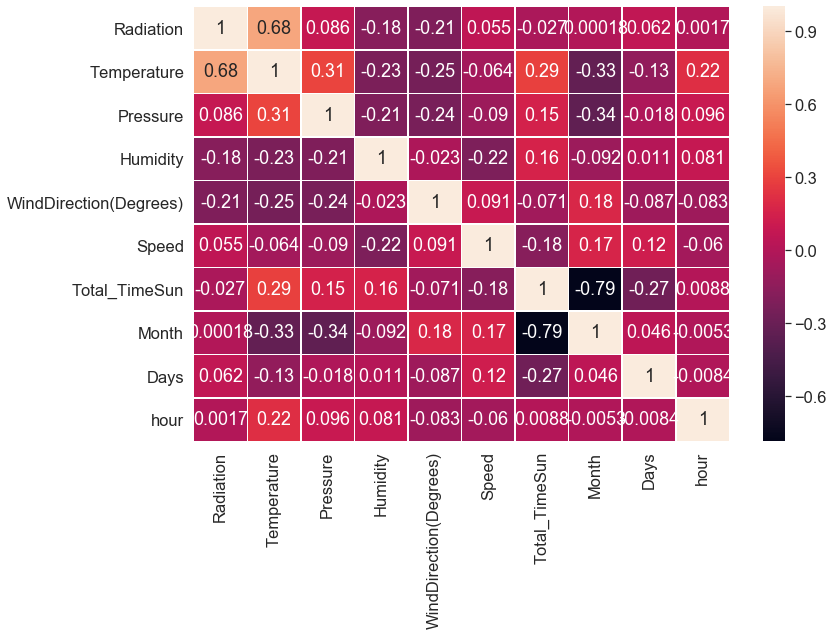

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(data_clean_outlier.corr(), annot=True, linewidths=.5)

#### Kesimpulan :
1. Data dengan clean outlier secara keseluruhan tidak memiliki perbedaan yang signifikan dengan data awalnya
2. Memiliki persebaran rata-rata radiasi yang sama setiap bulan telihat pada tes levene , dimana feature Month memiliki Unequal Variance

In [45]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Total_TimeSun,Time_conv,hour,Month,Days,Month_cat,direct
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,12,1900-01-01 23:55:26,23,9,29,September,South
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,12,1900-01-01 23:50:23,23,9,29,September,South
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,12,1900-01-01 23:45:26,23,9,29,September,South
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,12,1900-01-01 23:40:21,23,9,29,September,South
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,12,1900-01-01 23:35:24,23,9,29,September,East


In [46]:
data.insert(3,'Date_time',data_test)

In [47]:
data['Date_time'] = pd.to_datetime(data_test)

In [48]:
data.head()

,UNIXTime,Data,Time,Date_time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Total_TimeSun,Time_conv,hour,Month,Days,Month_cat,direct
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,2016-09-29,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,12,1900-01-01 23:55:26,23,9,29,September,South
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,2016-09-29,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,12,1900-01-01 23:50:23,23,9,29,September,South
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,2016-09-29,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,12,1900-01-01 23:45:26,23,9,29,September,South
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,2016-09-29,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,12,1900-01-01 23:40:21,23,9,29,September,South
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,2016-09-29,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,12,1900-01-01 23:35:24,23,9,29,September,East


In [49]:
final_data = pd.DataFrame(data, columns=['Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed',
            'Total_TimeSun','Month','Days','hour','Date_time'])
print(final_data.info())
display(final_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
Radiation                 32686 non-null float64
Temperature               32686 non-null int64
Pressure                  32686 non-null float64
Humidity                  32686 non-null int64
WindDirection(Degrees)    32686 non-null float64
Speed                     32686 non-null float64
Total_TimeSun             32686 non-null int64
Month                     32686 non-null int64
Days                      32686 non-null int64
hour                      32686 non-null int64
Date_time                 32686 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 2.7 MB
None


,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Total_TimeSun,Month,Days,hour,Date_time
0,1.21,48,30.46,59,177.39,5.62,12,9,29,23,2016-09-29
1,1.21,48,30.46,58,176.78,3.37,12,9,29,23,2016-09-29
2,1.23,48,30.46,57,158.75,3.37,12,9,29,23,2016-09-29
3,1.21,48,30.46,60,137.71,3.37,12,9,29,23,2016-09-29
4,1.17,48,30.46,62,104.95,5.62,12,9,29,23,2016-09-29


In [50]:
final_data.to_csv('clean_data_solar.csv', index = False)

In [51]:
data2.to_csv('clean_data_solar1.csv', index = False)

In [53]:
# select direct, avg(Speed)
# from data2
# group by Direct